In [64]:
#Loncq Aurélien
#Imports nécessaires
import numpy as np                                                                                                                
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

                     DATE  Temp (°C)  ChloroA (µg/l)  O2 (%)  Phyco (µg/l)  \
0     2018-05-30 09:40:00      23.44            0.00    94.6          2.79   
1     2018-05-30 09:50:00      23.46            0.07    94.7          1.60   
2     2018-05-30 10:00:00      23.49            0.00    94.7          0.00   
3     2018-05-30 10:10:00      23.52            0.00    94.8          0.31   
4     2018-05-30 11:20:00      23.81            0.13    94.7          3.23   
...                   ...        ...             ...     ...           ...   
19618 2021-11-24 11:00:00       6.40            3.52    86.5         27.16   
19619 2021-11-24 12:00:00       7.70            3.20    95.4         25.64   
19620 2021-11-24 13:00:00       9.00            3.44    95.3         26.78   
19621 2021-11-24 14:00:00       9.40            2.96    95.5         21.41   
19622 2021-11-24 15:00:00       9.20            3.08    95.6         24.97   

       SpConductivité (µS/cm)  
0                         0.1  

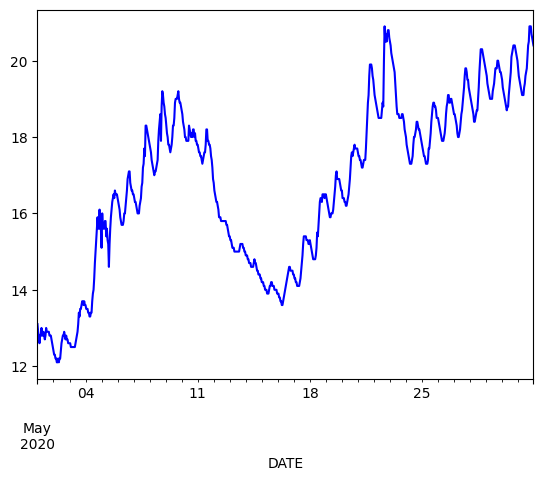

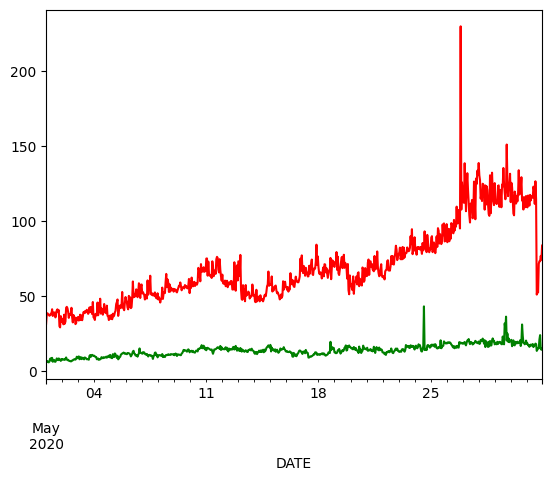

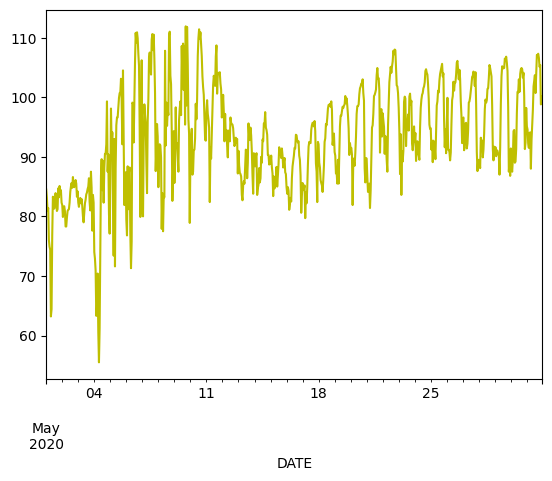

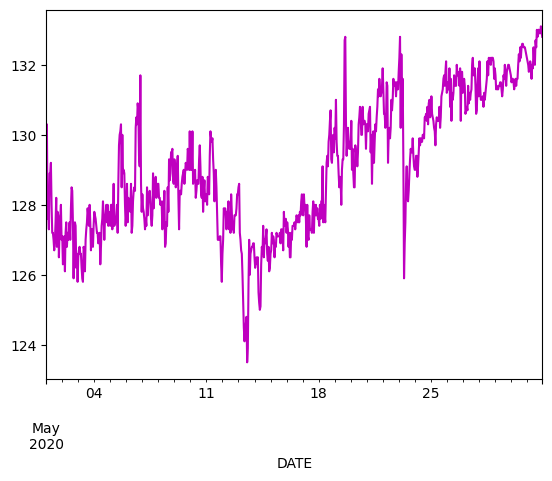

,Temp (°C),ChloroA (µg/l),O2 (%),Phyco (µg/l),SpConductivité (µS/cm)
Temp (°C),1.000000,0.194124,0.514699,0.263178,0.258096
ChloroA (µg/l),0.194124,1.000000,0.430469,0.111043,-0.099162
O2 (%),0.514699,0.430469,1.000000,-0.067753,-0.410070
Phyco (µg/l),0.263178,0.111043,-0.067753,1.000000,0.322704
SpConductivité (µS/cm),0.258096,-0.099162,-0.410070,0.322704,1.000000


In [65]:
#Nettoyage et affichage des données
data = pd.read_excel('input.xlsx',sheet_name='B_I')
data = data.drop(['ChloroA (V)','O2 (Mg/l)','Phyco (V)','Tension (V)','TensionSonde (V)'], axis=1)
print(data)
data.set_index('DATE',inplace=True)
plt.figure()
data['Temp (°C)']['2020-05'].plot(color='b')
plt.show()
plt.figure()
data['ChloroA (µg/l)']['2020-05'].plot(color='g')
data['Phyco (µg/l)']['2020-05'].plot(color='r')
plt.show()
plt.figure()
data['O2 (%)']['2020-05'].plot(color='y')
plt.show()
plt.figure()
data['SpConductivité (µS/cm)']['2020-05'].plot(color='m')
plt.show()
data.corr(method='spearman')

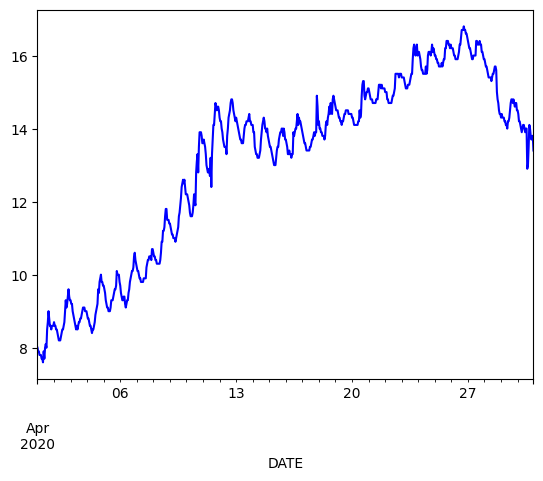

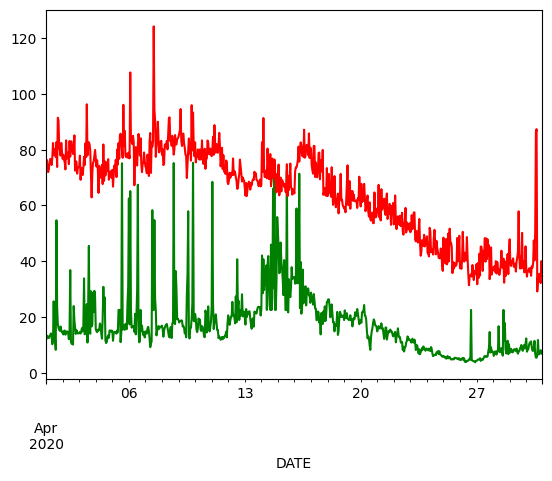

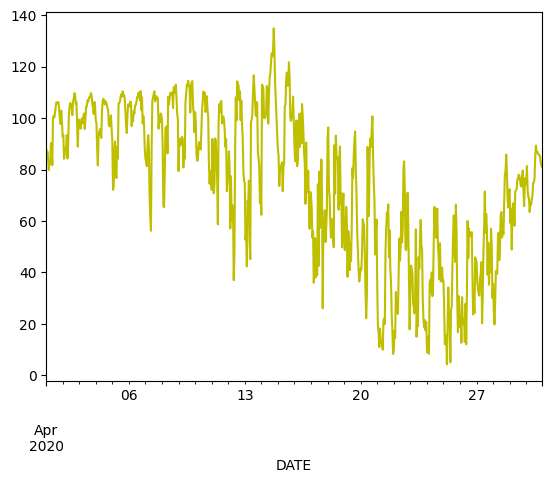

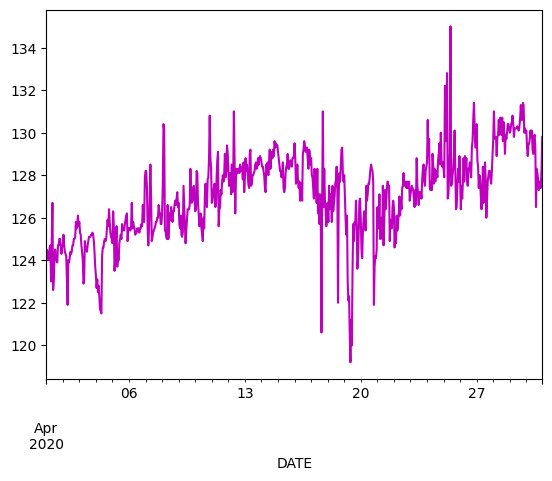

                        Temp (°C)  ChloroA (µg/l)    O2 (%)  Phyco (µg/l)  \
Temp (°C)                1.000000        0.194805  0.514724      0.263226   
ChloroA (µg/l)           0.194805        1.000000  0.422242      0.094982   
O2 (%)                   0.514724        0.422242  1.000000     -0.043312   
Phyco (µg/l)             0.263226        0.094982 -0.043312      1.000000   
SpConductivité (µS/cm)   0.263602       -0.095271 -0.410360      0.293587   

                        SpConductivité (µS/cm)  
Temp (°C)                             0.263602  
ChloroA (µg/l)                       -0.095271  
O2 (%)                               -0.410360  
Phyco (µg/l)                          0.293587  
SpConductivité (µS/cm)                1.000000  


In [66]:
#Remplacement des valeurs aberrantes

def replace_outliers(df,col_name):
    threshold=3.55
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    mean_col = np.mean(df[col_name])
    outliers = df[(df[col_name] <  Q1 - threshold * IQR) | (df[col_name] > Q3 + threshold * IQR)]
    df[col_name] = np.where((df[col_name] < Q1 - threshold * IQR) | (df[col_name] > Q3 + threshold * IQR),mean_col,df[col_name])
    return df
data = replace_outliers(data,'ChloroA (µg/l)')
data = replace_outliers(data,'O2 (%)')
data = replace_outliers(data,'Phyco (µg/l)')
data = replace_outliers(data,'SpConductivité (µS/cm)')
plt.figure()
data['Temp (°C)']['2020-04'].plot(color='b')
plt.show()
plt.figure()
data['ChloroA (µg/l)']['2020-04'].plot(color='g')
data['Phyco (µg/l)']['2020-04'].plot(color='r')
plt.show()
plt.figure()
data['O2 (%)']['2020-04'].plot(color='y')
plt.show()
plt.figure()
data['SpConductivité (µS/cm)']['2020-04'].plot(color='m')
plt.show()
print(data.corr(method='spearman'))

                          DATE  RR1    T   TD  FF2     U  GLO
0      2010-01-01 00:00:00.000  0.5  4.0  3.6  0.0  97.0  0.0
1      2010-01-01 01:00:00.000  0.5  4.1  3.8  0.2  98.0  0.0
2      2010-01-01 02:00:00.000  0.5  3.6  1.9  1.6  89.0  0.0
3      2010-01-01 03:00:00.000  0.0  3.1  1.5  3.0  89.0  0.0
4      2010-01-01 04:00:00.000  0.0  3.2  1.7  4.7  90.0  0.0
...                        ...  ...  ...  ...  ...   ...  ...
107203 2022-03-25 19:00:00.899  0.0  9.7 -1.7  1.4  45.0  0.0
107204 2022-03-25 20:00:00.899  0.0  8.1 -2.5  1.1  47.0  0.0
107205 2022-03-25 21:00:00.899  0.0  7.6 -2.0  1.1  51.0  0.0
107206 2022-03-25 22:00:00.899  0.0  8.3 -2.2  1.1  48.0  0.0
107207 2022-03-25 23:00:00.899  0.0  2.8 -2.0  1.4  71.0  0.0

[107208 rows x 7 columns]


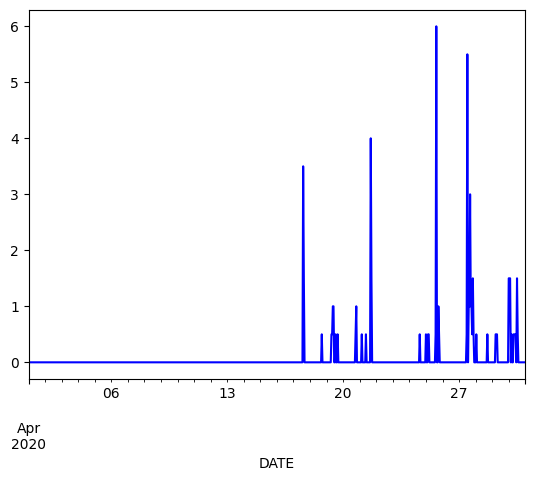

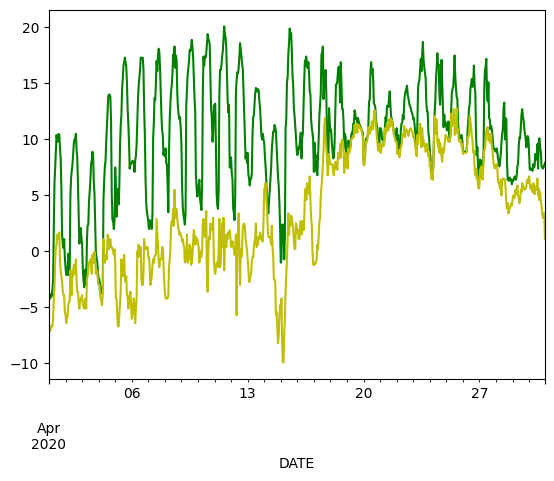

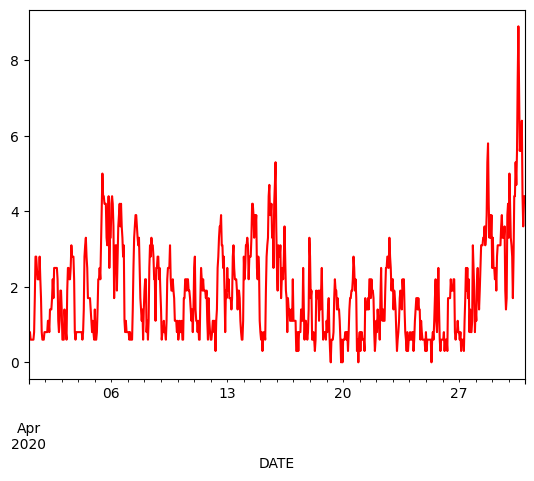

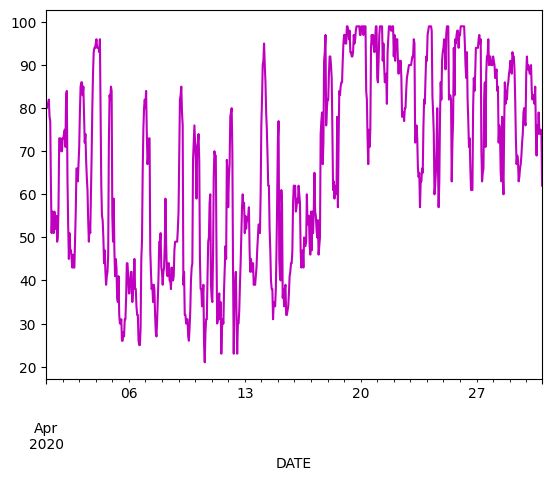

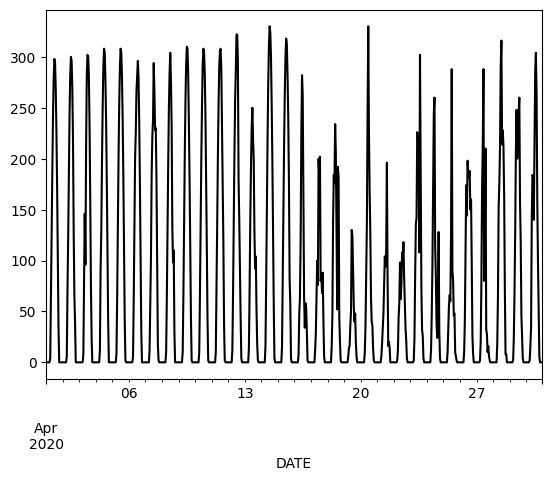

,RR1,T,TD,FF2,U,GLO
RR1,1.000000,-0.065726,0.036485,0.142997,0.227540,-0.059637
T,-0.065726,1.000000,0.861816,0.022635,-0.494448,0.479410
TD,0.036485,0.861816,1.000000,-0.079805,-0.059060,0.245098
FF2,0.142997,0.022635,-0.079805,1.000000,-0.235200,0.262639
U,0.227540,-0.494448,-0.059060,-0.235200,1.000000,-0.543142
GLO,-0.059637,0.479410,0.245098,0.262639,-0.543142,1.000000


In [67]:
#Données météo France de Saint-Genes
data_ST_GENES = pd.read_excel('input.xlsx',sheet_name='ST-GENES')
data_ST_GENES = data_ST_GENES.drop(['DATE.1','POSTE','Unnamed: 9','Unnamed: 10', 'Unnamed: 11','Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],axis=1)
print(data_ST_GENES)
data_ST_GENES.set_index('DATE',inplace=True)
plt.figure()
data_ST_GENES['RR1']['2020-04'].plot(color='b')
plt.show()
plt.figure()
data_ST_GENES['T']['2020-04'].plot(color='g')
data_ST_GENES['TD']['2020-04'].plot(color='y')
plt.show()
plt.figure()
data_ST_GENES['FF2']['2020-04'].plot(color='r')
plt.show()
plt.figure()
data_ST_GENES['U']['2020-04'].plot(color='m')
plt.show()
plt.figure()
data_ST_GENES['GLO']['2020-04'].plot(color='k')
plt.show()
data_ST_GENES.corr(method='spearman')

                     DATE  RR1    T   TD   FF    DXI     U
0     2010-01-01 00:00:00  0.2  3.4  2.7  1.0  190.0  95.0
1     2010-01-01 01:00:00  0.2  2.7  1.5  2.0  200.0  92.0
2     2010-01-01 02:00:00  0.2  2.2  1.3  4.7  260.0  93.0
3     2010-01-01 03:00:00  0.2  2.0  1.1  5.7  270.0  94.0
4     2010-01-01 04:00:00  0.2  2.1  1.7  8.6  270.0  97.0
...                   ...  ...  ...  ...  ...    ...   ...
96451 2021-01-01 19:00:00  0.0 -4.8 -6.0  4.4  100.0  90.0
96452 2021-01-01 20:00:00  0.0 -4.9 -6.4  4.7  110.0  89.0
96453 2021-01-01 21:00:00  0.0 -5.0 -6.7  5.6  110.0  88.0
96454 2021-01-01 22:00:00  0.0 -4.8 -6.0  4.1  120.0  90.0
96455 2021-01-01 23:00:00  0.0 -5.1 -6.0  5.1  100.0  92.0

[94879 rows x 7 columns]


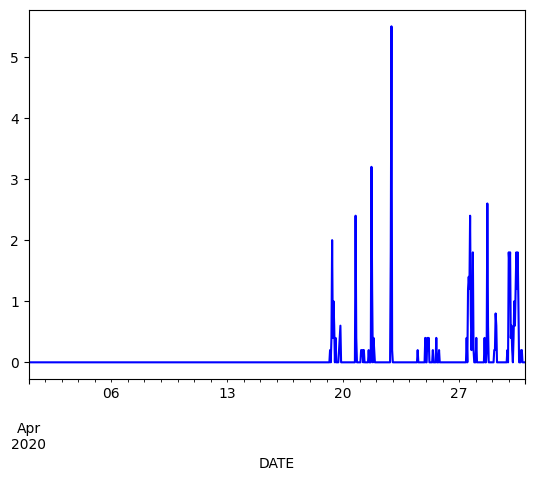

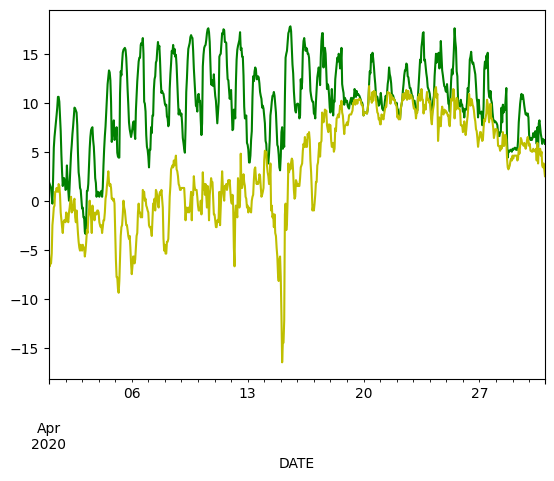

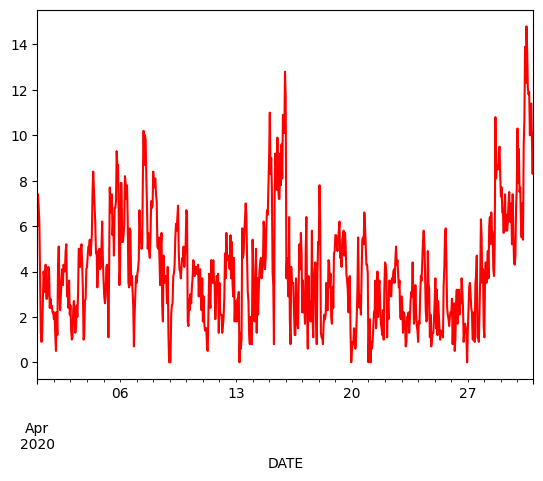

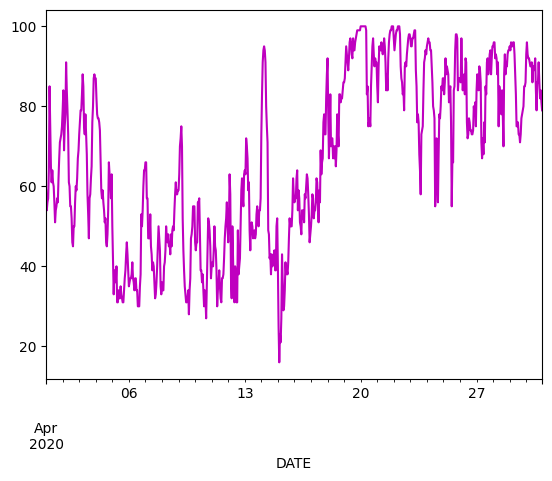

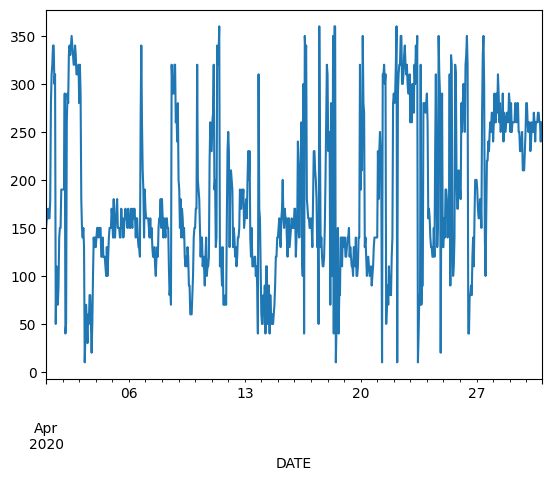

,RR1,T,TD,FF,DXI,U
RR1,1.000000,-0.021726,0.069372,0.102560,0.065704,0.150510
T,-0.021726,1.000000,0.783078,-0.152659,-0.068013,-0.524121
TD,0.069372,0.783078,1.000000,-0.076021,0.060109,0.102576
FF,0.102560,-0.152659,-0.076021,1.000000,0.109607,0.142192
DXI,0.065704,-0.068013,0.060109,0.109607,1.000000,0.219547
U,0.150510,-0.524121,0.102576,0.142192,0.219547,1.000000


In [68]:
#Données météo France de Vernines
data_Vernines = pd.read_excel('input.xlsx',sheet_name='VERNINES')
data_Vernines = data_Vernines.drop(['POSTE','DATE.1','NEIGETOT','TN','TX','DG','DXY','FXI','FXY','UN','HUN','UX','HUX','DHUMI40','DHUMI80','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'],axis=1)
data_Vernines = data_Vernines.dropna(axis=0)
print(data_Vernines)
data_Vernines.set_index('DATE',inplace=True)
plt.figure()
data_Vernines['RR1']['2020-04'].plot(color='b')
plt.show()
plt.figure()
data_Vernines['T']['2020-04'].plot(color='g')
data_Vernines['TD']['2020-04'].plot(color='y')
plt.show()
plt.figure()
data_Vernines['FF']['2020-04'].plot(color='r')
plt.show()
plt.figure()
data_Vernines['U']['2020-04'].plot(color='m')
plt.show()
plt.figure()
data_Vernines['DXI']['2020-04'].plot()
plt.show()
data_Vernines.corr()

In [69]:
#Assemblage des données
data_assemblage = data.merge(data_ST_GENES,how='inner',on='DATE')
data_assemblage = data_assemblage.merge(data_Vernines,how='inner',on='DATE')
print(data_assemblage.head())

                     Temp (°C)  ChloroA (µg/l)  O2 (%)  Phyco (µg/l)  \
DATE                                                                   
2018-05-30 10:00:00      23.49            0.00    94.7          0.00   
2018-05-30 12:00:00      23.83            0.00    94.8          0.49   
2018-05-30 13:00:00      23.89            0.00    94.7          2.64   
2018-05-30 14:00:00      24.03            0.05    94.8          5.98   
2018-05-30 15:00:00      24.26            0.13    95.0          1.95   

                     SpConductivité (µS/cm)  RR1_x   T_x  TD_x  FF2   U_x  \
DATE                                                                        
2018-05-30 10:00:00              138.386944    0.0  16.4  13.4  1.9  82.0   
2018-05-30 12:00:00              138.386944    0.0  15.7  13.2  2.8  85.0   
2018-05-30 13:00:00              138.386944    0.0  15.8  13.7  2.8  87.0   
2018-05-30 14:00:00              138.386944    0.0  15.9  13.1  2.5  83.0   
2018-05-30 15:00:00              

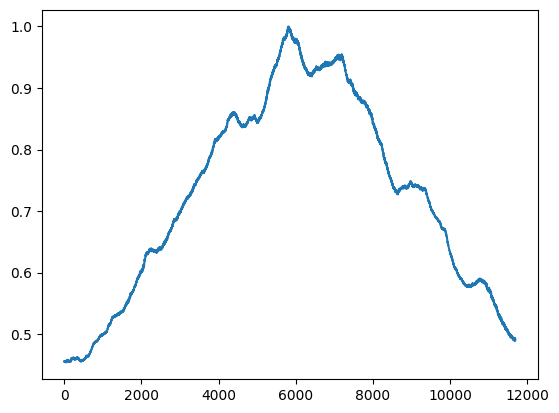

In [70]:
#Cross correlation entre phyco et chloro
from scipy.signal import correlate
cross_correlate = correlate(data_assemblage['ChloroA (µg/l)'],data_assemblage['Phyco (µg/l)'],mode='same')
cross_correlate = cross_correlate/np.max(cross_correlate)
plt.plot(cross_correlate)

[-1 -1 -1 ... -1 -1 -1]


Text(0.5, 1.0, 'UMAP projection of all the selected data clustered')

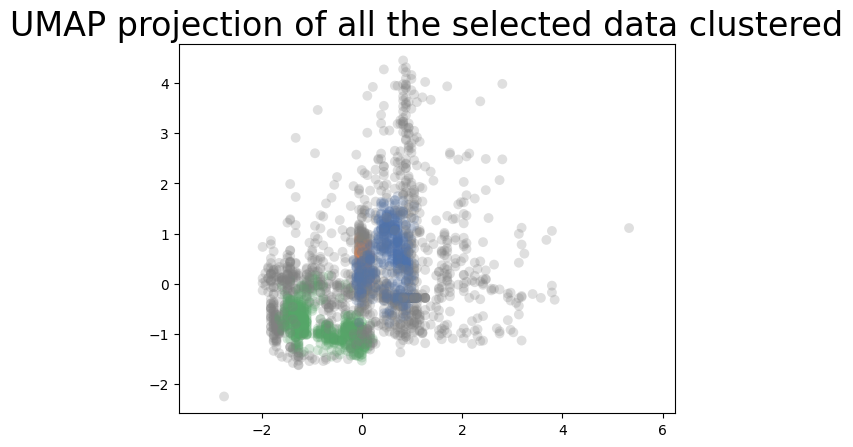

In [76]:
#Umap et HDBSCAN clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
import umap
selected_data = data['2020-12':'2021-03']
reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(selected_data)
embedding = reducer.fit_transform(scaled_data)
embedding.shape
clusterer = HDBSCAN(min_cluster_size=60)
clusterer.fit(scaled_data)
print(clusterer.labels_)
color_palette = sns.color_palette('deep', 8)
num_colors = len(color_palette)
cluster_colors = [color_palette[x % num_colors] if 0 <= x < num_colors else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(scaled_data[:,0],scaled_data[:,1], s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of all the selected data clustered', fontsize=24)